In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file
df = pd.read_csv("./ELICITATIONS/test_1/DATA//seed.csv")
df2 = pd.read_csv("./ELICITATIONS/test_1/DATA/questionnaire.csv")

# Display the first few rows
df2["REALIZATION"][:10]

0    2448000.00
1          2.20
2         49.78
3         11.56
4         23.00
5         15.00
6       2000.00
7       9243.00
8         35.00
9         45.00
Name: REALIZATION, dtype: float64

In [11]:
Q1 = df.loc[:, df.columns.str.startswith("1.")]
expert_1 = Q1.iloc[-1]
quantile_5 = int(expert_1.iloc[0])
quantile_50 = int(expert_1.iloc[1])
quantile_95 = int(expert_1.iloc[2])
df

,timestamp,First Name,Last Name,Email address,1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 50%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 95%ile (0;inf) [num],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 50%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 95%ile (0;100) [%],...,7. Number of train operated genova to paduva in 2024 - 95%ile (0;inf) [TEUs],8. Total number of train in 2024 - 5%ile (0;inf) [TEUs],8. Total number of train in 2024 - 50%ile (0;inf) [TEUs],8. Total number of train in 2024 - 95%ile (0;inf) [TEUs],9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 50%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 95%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 5%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 50%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 95%ile (0;100) [%]
0,2023-03-14-15-11-07,A_10,AA_10,AAA_10,2000000,2200000,2400000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
1,2023-03-14-09-14-20,A9,AA9,AAA9,1220000,1380000,1550000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
2,2023-03-13-12-53-27,A8,AA8,AAA8,1180000,1300000,1350000,1.90,2.40,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
3,2023-03-13-12-37-09,A7,AA7,AAA7,1300000,1350000,1450000,2.60,2.70,3.00,...,18,8,14,22,20000,45000,65000,40,45,55.0
4,2023-03-13-12-16-55,A6,AA6,AAA6,1100000,1420000,1500000,1.50,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
5,2023-03-13-12-09-05,A5,AA5,AAA5,1410000,1450000,1500000,2.40,2.50,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
6,2023-03-13-10-28-27,A4,AA4,AAA4,1340000,1350000,1500000,2.00,2.20,2.40,...,18,8,14,22,20000,45000,65000,40,45,55.0
7,2023-03-10-18-13-12,A3,AA3,AAA3,2370000,2380000,2400000,2.20,2.25,2.30,...,1980,10000,10200,10500,45,49,55,46,48,48.5
8,2023-03-10-18-08-49,A2,AA2,AAA2,2350000,2450000,2600000,1.80,2.10,2.50,...,2120,8600,10000,11000,30,40,52,40,48,50.0
9,2023-03-10-18-05-18,A1,AA1,AAA1,2400000,2447000,2500000,2.12,2.20,2.25,...,2050,9050,10000,10500,38,45,60,44,47,48.0


In [12]:
list(float(x) for x in df.iloc[-1][4::3][:])

[2400000.0, 2.12, 47.5, 9.0, 22.2, 15.0, 1800.0, 9050.0, 38.0, 44.0]

ValueError: x and y must be the same size

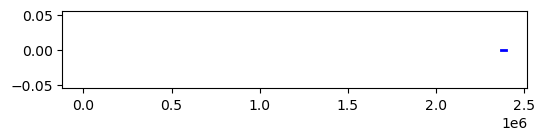

In [13]:
fig, ax = plt.subplots(figsize=(6, 1))

# Plot horizontal line between q5 and q95
ax.plot([q5, q95], [0, 0], color='b', linestyle='-', linewidth=2, label="90% CI")

# Plot individual points
ax.scatter([q5, q50, q95], [0, 0, 0], color='r', zorder=3)

# Labels
ax.set_yticks([])  # Remove y-axis
ax.set_xlabel("Value")
ax.set_title("Quantile Visualization")

# Annotate quantiles
ax.text(q5, 0, " 5%", verticalalignment='center', fontsize=10, color='black')
ax.text(q50, 0, " 50%", verticalalignment='center', fontsize=10, color='black')
ax.text(q95, 0, " 95%", verticalalignment='center', fontsize=10, color='black')

plt.legend()
plt.show()


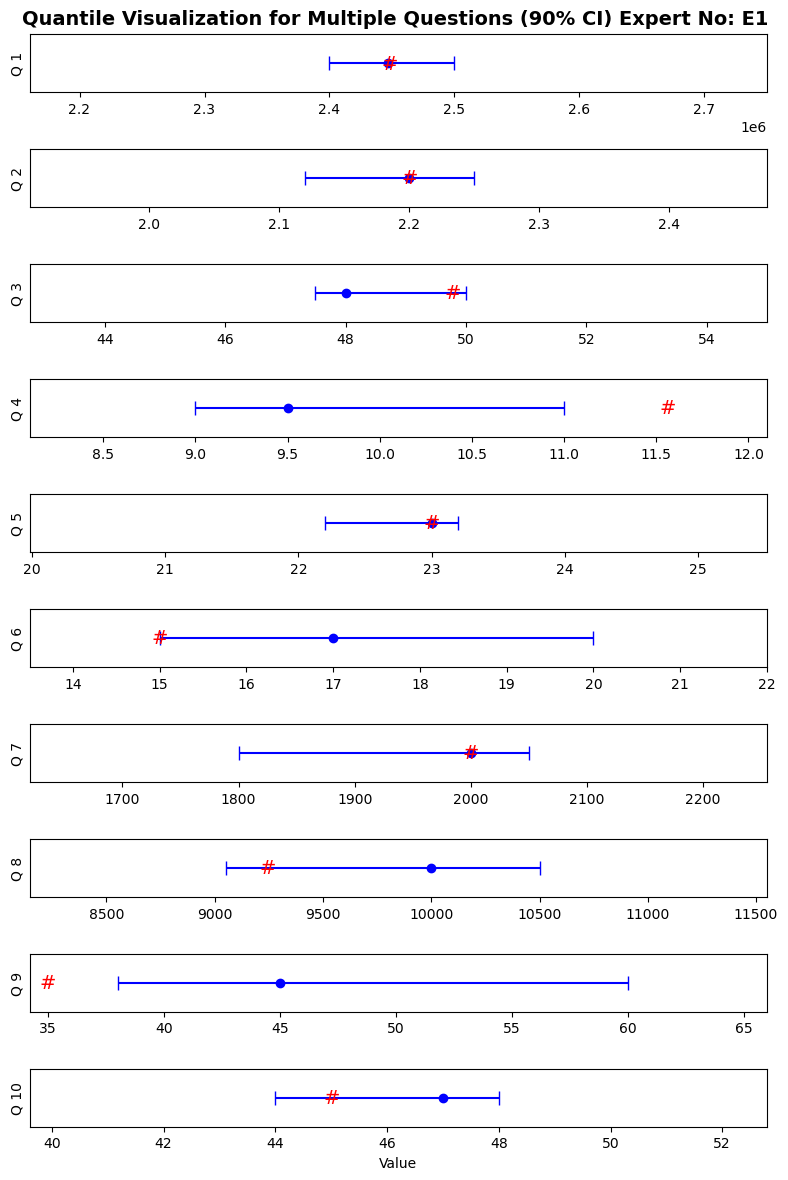

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-1][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-1][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-1][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E1", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure1.png", dpi=300, bbox_inches='tight')
plt.show()

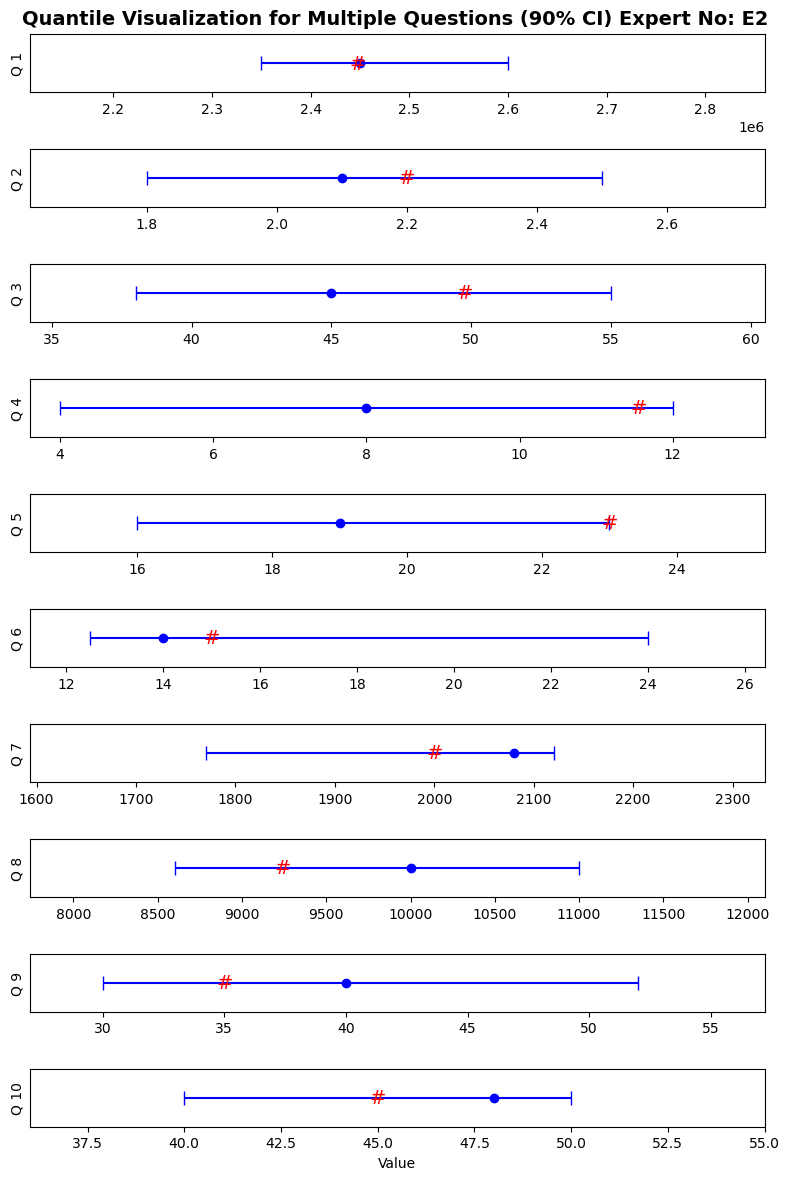

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-2][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-2][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-2][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E2", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .1*q5[i], q95[i] + .1*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure2.png", dpi=300, bbox_inches='tight')
plt.show()

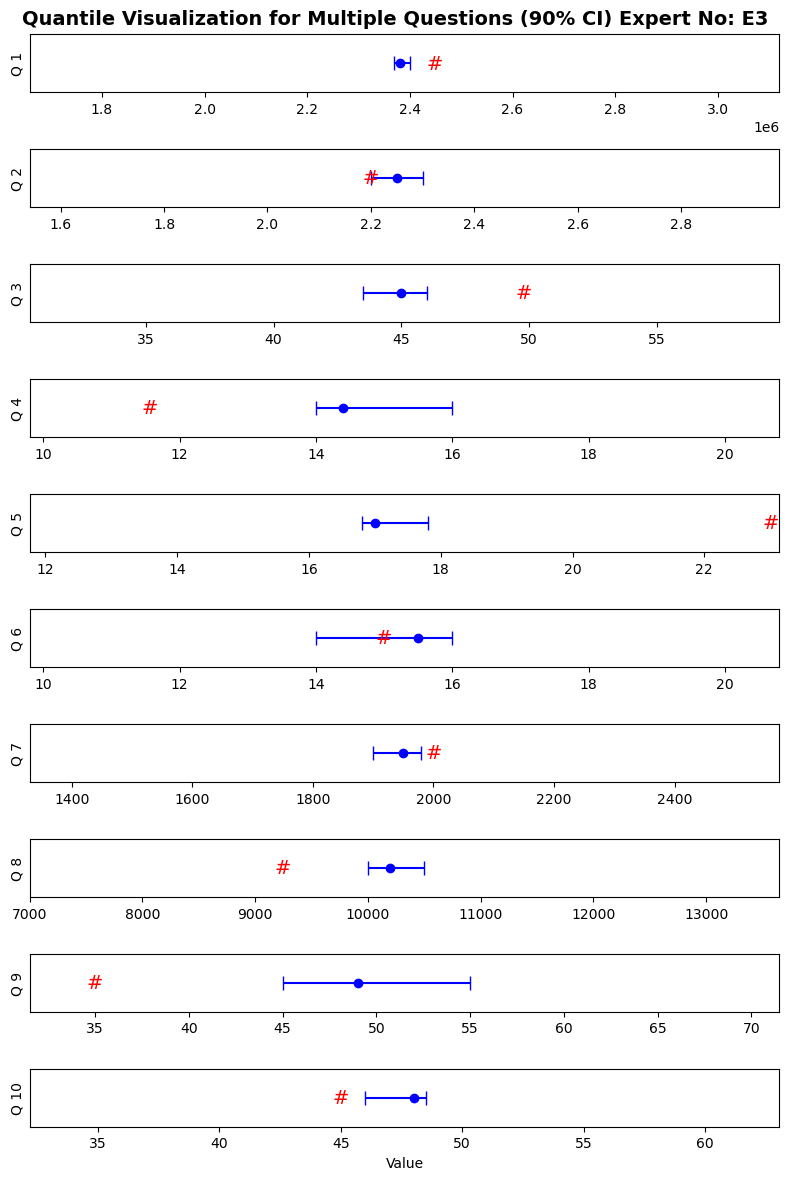

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for 10 variables (each with 5%, 50%, 95% quantiles)
num_q = 10
variables = [f"Q {i+1}" for i in range(num_q)]
realization = df2["REALIZATION"][:10]

# Generate example quantiles
np.random.seed(42)  # For reproducibility
# q5 = np.random.randint(5, 15, num_vars)   # 5th percentile
# q5 = np.array([float(x) for x in df.iloc[-1][4::3][:]], dtype=float)
q5 = df.iloc[-3][4::3].to_numpy(dtype=float)
# q50 = np.random.randint(15, 25, num_vars) # 50th percentile (median)
q50 = df.iloc[-3][5::3].to_numpy(dtype=float)
# q95 = np.random.randint(25, 35, num_vars) # 95th percentile
q95 = df.iloc[-3][6::3].to_numpy(dtype=float)

# Compute error values for error bars
lower_errors = q50 - q5
upper_errors = q95 - q50

# Plotting multiple axes with independent scales
fig, axes = plt.subplots(num_q, 1, figsize=(8, 12), sharex=False)  # Separate y-axes

# Add a title to the whole figure
fig.suptitle("Quantile Visualization for Multiple Questions (90% CI) Expert No: E3", fontsize=14, fontweight="bold")

fig.gca().spines.values()
# spine.set_edgecolor("black")
# spine.set_linewidth(2)


for i, ax in enumerate(axes):
    ax.errorbar(q50[i], 0, xerr=[[lower_errors[i]], [upper_errors[i]]], fmt='o', color='b', capsize=5, label="90% CI")
    ax.text(realization[i], 0, "#", fontsize=14, color='red', ha='center', va='center')
    # ax.set_title(variables[i], fontsize=10)
    ax.set_ylabel(variables[i], fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlim(q5[i] - .3*q5[i], q95[i] + .3*q95[i])  # Independent x-axis limits for each variable

# Adjust layout
plt.xlabel("Value")
# plt.title("Expert No: E1")
plt.tight_layout()
plt.savefig("figure3.png", dpi=300, bbox_inches='tight')
plt.show()

In [17]:
df

,timestamp,First Name,Last Name,Email address,1. Total Containers Flow in 2024 (TEUs) - 5%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 50%ile (0;inf) [num],1. Total Containers Flow in 2024 (TEUs) - 95%ile (0;inf) [num],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 5%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 50%ile (0;100) [%],2. Growth Rate of Container Traffic 2023 to 2024 (%) - 95%ile (0;100) [%],...,7. Number of train operated genova to paduva in 2024 - 95%ile (0;inf) [TEUs],8. Total number of train in 2024 - 5%ile (0;inf) [TEUs],8. Total number of train in 2024 - 50%ile (0;inf) [TEUs],8. Total number of train in 2024 - 95%ile (0;inf) [TEUs],9. Percentage of train modes destination is Lombardy in 2024 (%)- 5%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 50%ile (0;100) [%],9. Percentage of train modes destination is Lombardy in 2024 (%) - 95%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 5%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 50%ile (0;100) [%],10. Percentage of total containers transported by train is departure (%) - 95%ile (0;100) [%]
0,2023-03-14-15-11-07,A_10,AA_10,AAA_10,2000000,2200000,2400000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
1,2023-03-14-09-14-20,A9,AA9,AAA9,1220000,1380000,1550000,1.90,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
2,2023-03-13-12-53-27,A8,AA8,AAA8,1180000,1300000,1350000,1.90,2.40,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
3,2023-03-13-12-37-09,A7,AA7,AAA7,1300000,1350000,1450000,2.60,2.70,3.00,...,18,8,14,22,20000,45000,65000,40,45,55.0
4,2023-03-13-12-16-55,A6,AA6,AAA6,1100000,1420000,1500000,1.50,2.20,2.30,...,18,8,14,22,20000,45000,65000,40,45,55.0
5,2023-03-13-12-09-05,A5,AA5,AAA5,1410000,1450000,1500000,2.40,2.50,2.60,...,18,8,14,22,20000,45000,65000,40,45,55.0
6,2023-03-13-10-28-27,A4,AA4,AAA4,1340000,1350000,1500000,2.00,2.20,2.40,...,18,8,14,22,20000,45000,65000,40,45,55.0
7,2023-03-10-18-13-12,A3,AA3,AAA3,2370000,2380000,2400000,2.20,2.25,2.30,...,1980,10000,10200,10500,45,49,55,46,48,48.5
8,2023-03-10-18-08-49,A2,AA2,AAA2,2350000,2450000,2600000,1.80,2.10,2.50,...,2120,8600,10000,11000,30,40,52,40,48,50.0
9,2023-03-10-18-05-18,A1,AA1,AAA1,2400000,2447000,2500000,2.12,2.20,2.25,...,2050,9050,10000,10500,38,45,60,44,47,48.0


In [21]:
df2

,IDX,LABEL,SHORT Q,LONG Q_ENG,UNITS,SCALE,MINVAL,MAXVAL,REALIZATION,QUEST_TYPE,IDXMIN,IDXMAX,SUM50,PARENT,IMAGE
0,1,1,Total Containers Flow in 2024 (TEUs),The guess for the total container throughput a...,num,uni,0,inf,2448000.00,seed,0,0,0,-1,NaN
1,2,2,Growth Rate of Container Traffic 2023 to 2024 (%),The guess for the annual growth rate of contai...,%,uni,0,100.0,2.20,seed,0,0,0,-1,NaN
2,3,3,Import flow type percentage in 2024 (%),The guess for the percentage of North Italy’s ...,%,uni,0,100.0,49.78,seed,0,0,0,-1,NaN
3,4,4,Transhiped flow mode percentage in 2024 (%),The guess for the average turnaround time for ...,%,uni,0,100.0,11.56,seed,0,0,0,-1,NaN
4,5,5,Empty containers percentage in 2024 (%),The guess for the total number of operational ...,%,uni,0,100.0,23.00,seed,0,0,0,-1,NaN
5,6,6,Total gateway container flow was transported b...,The guess for the TEUs handled per crane per d...,%,log,0,100.0,15.00,seed,0,0,0,-1,NaN
6,7,7,Number of train operated genova to paduva in 2024,The guess for the percentage of total cargo tr...,num,uni,0,inf,2000.00,seed,0,0,0,-1,NaN
7,8,8,Total number of train in 2024,The guess for the average delay due to customs...,num,uni,0,inf,9243.00,seed,0,0,0,-1,NaN
8,9,9,Percentage of train modes destination is Lomba...,The guess for the number of TEUs carried by a ...,%,log,0,100.0,35.00,seed,0,0,0,-1,NaN
9,10,10,Percentage of total containers transported by ...,The guess for the percentage of 20ft container...,%,uni,0,100.0,45.00,seed,0,0,0,-1,NaN


In [22]:
df2.iloc[:, 8]


0     2448000.00
1           2.20
2          49.78
3          11.56
4          23.00
5          15.00
6        2000.00
7        9243.00
8          35.00
9          45.00
10           NaN
11           NaN
12           NaN
Name: REALIZATION, dtype: float64

In [42]:
list(df.iloc[:,4])

[2000000,
 1220000,
 1180000,
 1300000,
 1100000,
 1410000,
 1340000,
 2370000,
 2350000,
 2400000]

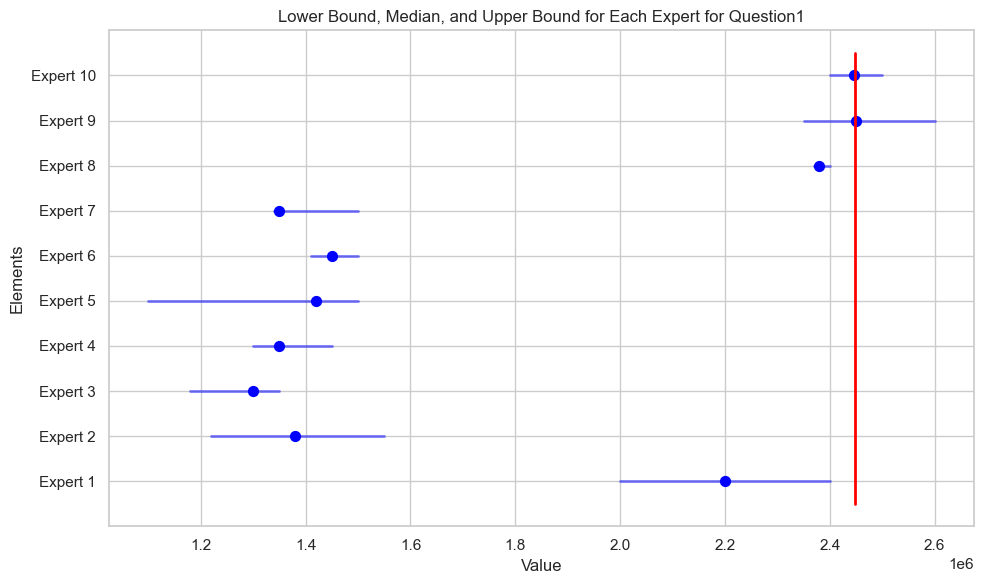

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
lower_bounds = list(df.iloc[:,4]) # 10 elements
medians = list(df.iloc[:,5])
upper_bounds = list(df.iloc[:,6])

realization = list(df2.iloc[:, 8])[0]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot lines for each element
for i in range(10):
    y_pos = i + 1  # y increases by 1 for each element
    
    # Plot the range (lower to upper bound)
    plt.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
             color='blue', alpha=0.5, linewidth=2)
    
    
    # Add a dot at the median position
    plt.scatter(medians[i], y_pos, color='blue', s=50)

# Plot the range (lower to upper bound)
plt.plot([realization, realization], [.5, 10.5], color='red', linewidth=2)  # Line from (3,1) to (5,1)


# Customize the plot
plt.yticks(np.arange(1, 11), [f"Expert {i+1}" for i in range(10)])
plt.xlabel("Value")
plt.ylabel("Elements")
plt.title("Lower Bound, Median, and Upper Bound for Each Expert for Question1")
plt.grid(True, axis='x')

plt.tight_layout()
plt.show()

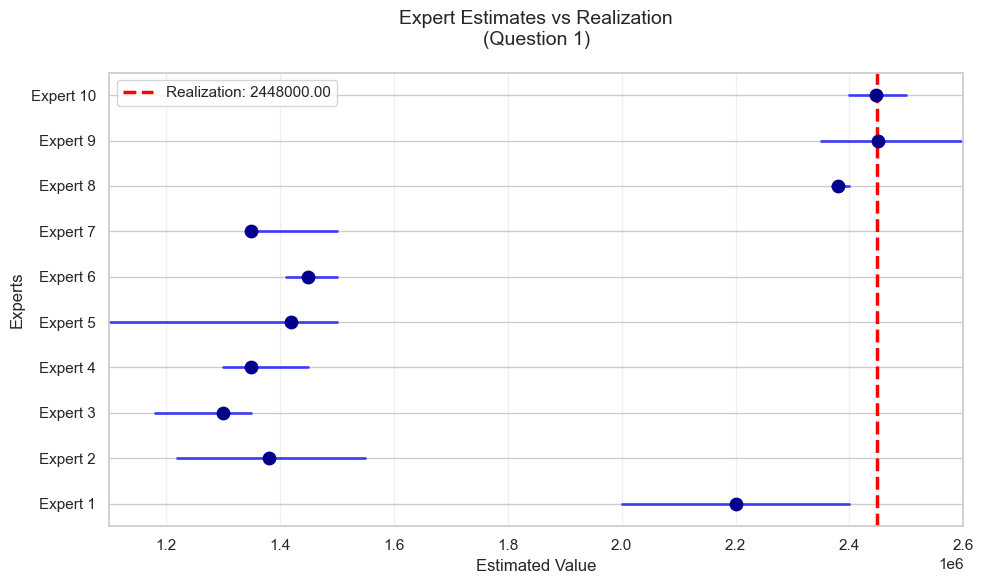

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot expert ranges and medians
for i in range(10):
    y_pos = i + 1
    
    # Plot the range lines
    plt.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
             color='blue', alpha=0.7, linewidth=2)
    
    # Plot median marker
    plt.scatter(medians[i], y_pos, color='darkblue', s=80, zorder=3)

# Plot realization line (red vertical line)
plt.axvline(x=realization, color='red', linewidth=2.5, linestyle='--', 
            label=f'Realization: {realization:.2f}')

# Add visual elements
plt.xlim(min(lower_bounds + [realization]) - 0.5, 
         max(upper_bounds + [realization]) + 0.5)
plt.ylim(0.5, 10.5)

# Customize labels and titles
plt.yticks(np.arange(1, 11), [f"Expert {i+1}" for i in range(10)])
plt.xlabel("Estimated Value", fontsize=12)
plt.ylabel("Experts", fontsize=12)
plt.title("Expert Estimates vs Realization\n(Question 1)", fontsize=14, pad=20)

# Add legend and grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

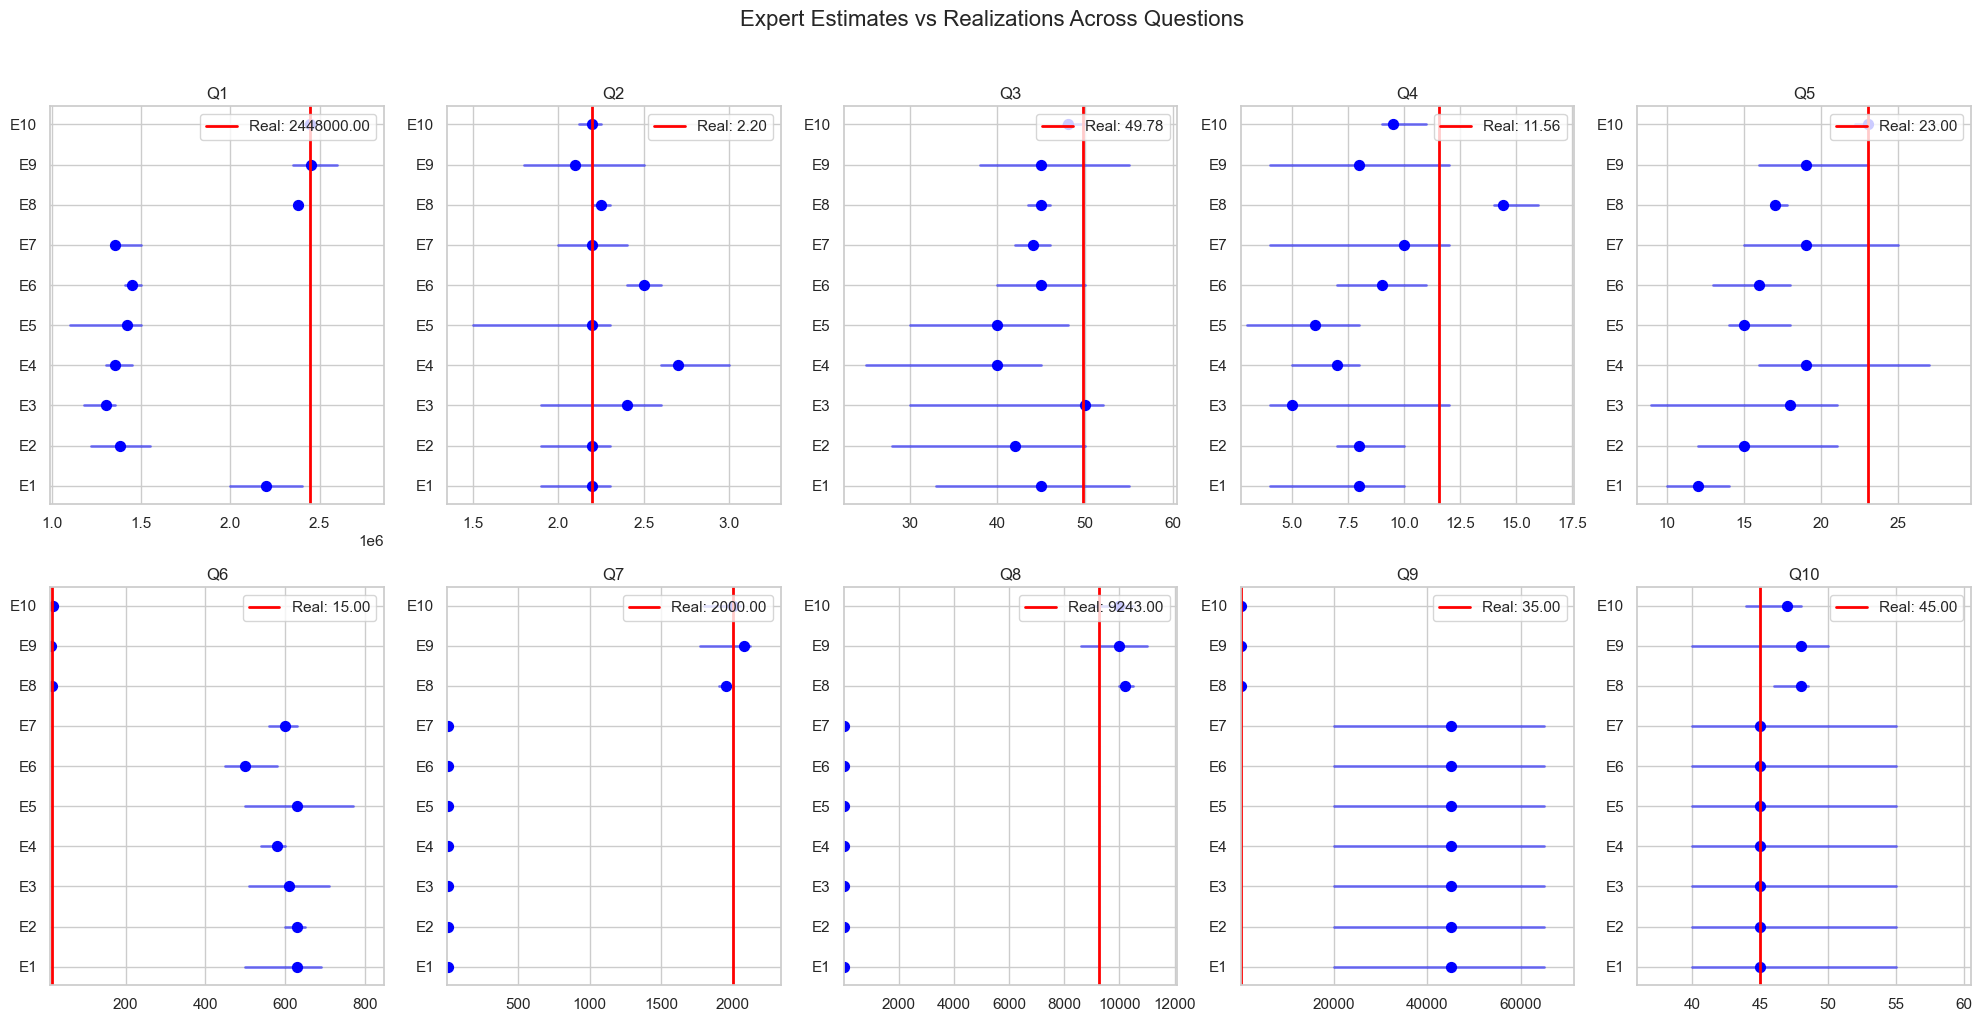

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid")

# Create figure with 10 subplots (2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Expert Estimates vs Realizations Across Questions', y=1.02, fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create each subplot
for fig_num in range(10):
    ax = axes[fig_num]
    
    # Determine column offsets
    lb_col = 4 + fig_num*3
    med_col = 5 + fig_num*3
    ub_col = 6 + fig_num*3
    
    # Get data
    lower_bounds = list(df.iloc[:, lb_col])
    medians = list(df.iloc[:, med_col])
    upper_bounds = list(df.iloc[:, ub_col])
    realization = list(df2.iloc[:, 8])[fig_num]
    
    # Plot expert ranges and medians
    for i in range(10):
        y_pos = i + 1
        
        # Plot the range
        ax.plot([lower_bounds[i], upper_bounds[i]], [y_pos, y_pos], 
                color='blue', alpha=0.5, linewidth=2)
        
        # Plot median dot
        ax.scatter(medians[i], y_pos, color='blue', s=50)
    
    # Plot realization line
    ax.axvline(x=realization, color='red', linewidth=2, 
               label=f'Real: {realization:.2f}')
    
    # Customize subplot
    ax.set_yticks(np.arange(1, 11))
    ax.set_yticklabels([f"E{i+1}" for i in range(10)])
    ax.set_title(f'Q{fig_num+1}')
    ax.grid(True, axis='x')
    ax.legend(loc='upper right')
    
    # Set consistent x-axis limits across all subplots if desired
    all_values = lower_bounds + medians + upper_bounds + [realization]
    ax.set_xlim(min(all_values)*0.9, max(all_values)*1.1)

plt.tight_layout()
plt.show()